In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('World_Happiness_2019.csv')

In [2]:
# reading the dataset in
dataset = pd.read_csv('World_Happiness_2019.csv')
# converting to dataframe
df = pd.DataFrame(data=dataset)
#display all columns from dataset 
pd.set_option('display.max_columns', None)

In [3]:
# examining data 

# display top 5 rows from dataset
print (df.head())
 # display the size of the dataset - 156 x 9
print (df.shape)
# display dataframe info - datatypes missing values etc.   
print (df.info()) 
# display basic info on each column (rows, mean, std, etc.)
print (df.describe())
# display all column names
print (df.columns) 

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [4]:
pd.isna(dataset)
print('Nan' , dataset.isna().sum(), sep='\n')

Nan
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


In [5]:
#Check Ireland's resuls
df.loc[df['Country or region']=='Ireland']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.31


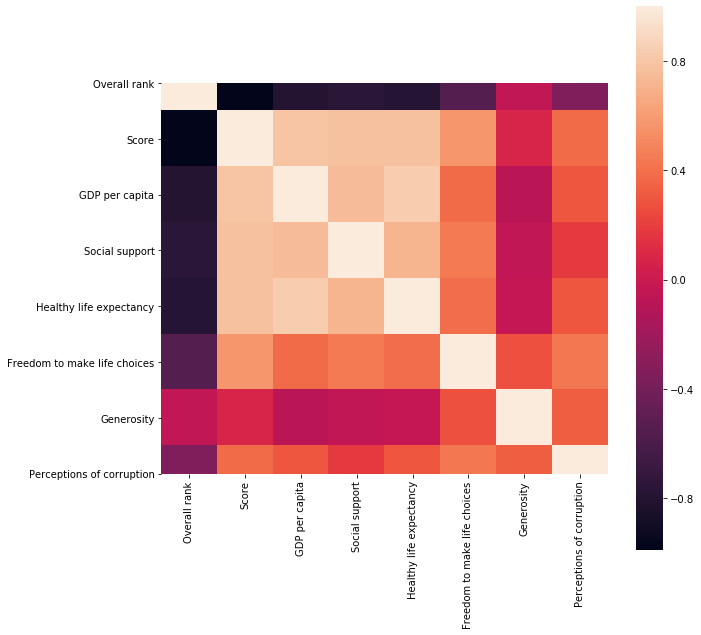

In [6]:
#Heat map
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True)

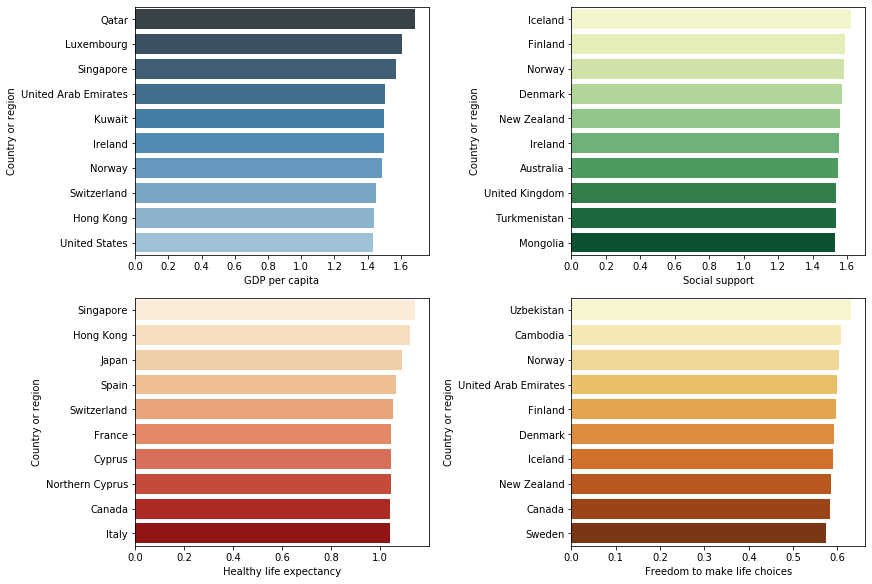

In [7]:
#top 10 countries by attribute
fig1, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',
            data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],
            palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',
            data=df.nlargest(10,'Social support'),ax=axes[0,1],
            palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',
            data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],
            palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',
            data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],
            palette='YlOrBr')

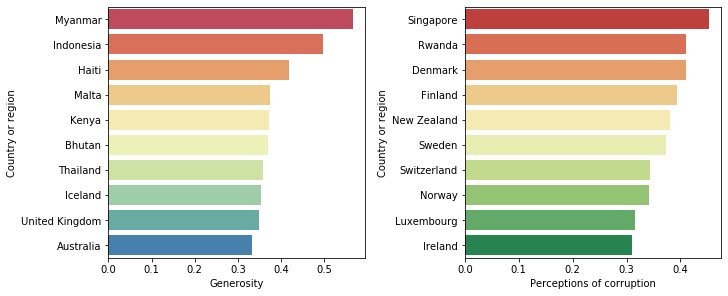

In [8]:
fig2, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',
            data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region'
            ,data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],
            palette='RdYlGn')

In [9]:
#Load in  top 10
d= df[(df['Country or region'].isin(['Finland','Denmark','Norway',
       'Iceland','Netherlands','Switzerland','Sweden','New Zealand','Canada','Austria','Ireland']))]
print (d)

    Overall rank Country or region  Score  GDP per capita  Social support  \
0              1           Finland  7.769           1.340           1.587   
1              2           Denmark  7.600           1.383           1.573   
2              3            Norway  7.554           1.488           1.582   
3              4           Iceland  7.494           1.380           1.624   
4              5       Netherlands  7.488           1.396           1.522   
5              6       Switzerland  7.480           1.452           1.526   
6              7            Sweden  7.343           1.387           1.487   
7              8       New Zealand  7.307           1.303           1.557   
8              9            Canada  7.278           1.365           1.505   
9             10           Austria  7.246           1.376           1.475   
15            16           Ireland  7.021           1.499           1.553   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
0 

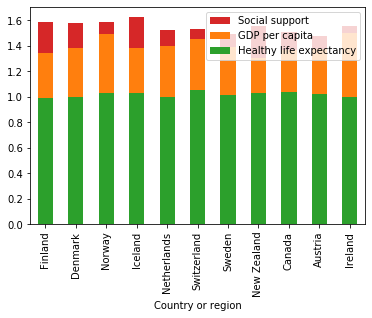

In [10]:
# Plot top 10 in stacked bar
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

In [12]:
plotset = df.groupby('Score')[dataset.columns[3:]].sum()
print(plotset)

       GDP per capita  Social support  Healthy life expectancy  \
Score                                                            
2.853           0.306           0.575                    0.295   
3.083           0.026           0.000                    0.105   
3.203           0.350           0.517                    0.361   
3.231           0.476           0.885                    0.499   
3.334           0.359           0.711                    0.614   
...               ...             ...                      ...   
7.488           1.396           1.522                    0.999   
7.494           1.380           1.624                    1.026   
7.554           1.488           1.582                    1.028   
7.600           1.383           1.573                    0.996   
7.769           1.340           1.587                    0.986   

       Freedom to make life choices  Generosity  Perceptions of corruption  
Score                                                           